# Proyecto - MLP
#### Huber Torres Lemus
#### Carné: 22000782

## Dataset MNIST
Para esta parte del proyecto se utilizara el dataset mnist para la identificación de Números escritos a mano utilizando una red neuronal del tipo Multi-Layer-Perceptron

#### Librerias

In [44]:
from keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import Input
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
import itertools

#### Dataset

In [53]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [72]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


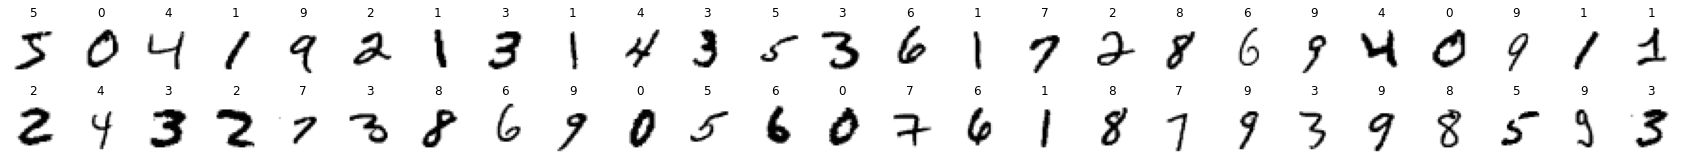

In [92]:
n_rows = 2
n_cols = 25
class_names = [i for i in range(10)]
plt.figure(figsize=(n_cols * 1.2, n_rows *1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(train_X[index].reshape(28,28), cmap='binary')
        plt.axis('off')
        plt.title(train_y[index].squeeze(), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### matriz de confusión 
Es una herramienta que permite visualizar el desempeño de un algoritmo  de aprendizaje supervisado.

Fuente: https://www.juanbarrios.com/la-matriz-de-confusion-y-sus-metricas/

In [119]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Matriz de Confusion', cmap=plt.cm.Blues):
    plt.figure(figsize=(5.5, 5.5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(shrink = 0.6)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        
    thresh = cm.max()/2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def errores(model, y_train, y_test, lab_test, x_train, x_test):
    score = model.evaluate(y_train, y_test, verbose=0)
    print('Test loss', score[0])
    print('Test accuracy', score[1])
    print('Test loss', 1-score[1])
    print('\n')
    scoret = model.evaluate(x_train, x_test, verbose=0)
    print('Test loss', scoret[0])
    print('Test accuracy', scoret[1])
    print('Test loss', 1-scoret[1])
    print('\n')
    LR_pred = model.predict(y_train)
    LR_pred_c = np.argmax(LR_pred, axis=1).reshape(lab_test.shape)
    target_names = ['0','1','2','3','4','5','6','7','8','9']
    print('Classification Report')
    report = classification_report(lab_test, LR_pred_c, target_names=target_names, output_dict=False)
    print(report)
    cm = confusion_matrix(lab_test, LR_pred_c)
    plot_confusion_matrix(cm,target_names,normalize=False,title='Matriz de Confusion')

#### Regresion Logistica - MNIST

In [120]:
LR = Sequential()
LR.add(Input(shape=784))
LR.add(Dense(units=10, kernel_regularizer=regularizers.L1(0.001),activation='softmax'))
LR.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
LR.h = LR.fit(train_X.reshape(60000, 784), train_y, epochs=30, validation_data=(test_X.reshape(10000, 784), test_y))

Epoch 1/30
1875/1875 [==============================] - 1s 554us/step - loss: 9.6109 - accuracy: 0.8384 - val_loss: 6.3044 - val_accuracy: 0.8670
Epoch 2/30
1875/1875 [==============================] - 1s 489us/step - loss: 6.1691 - accuracy: 0.8711 - val_loss: 7.0821 - val_accuracy: 0.8526
Epoch 3/30
1875/1875 [==============================] - 1s 478us/step - loss: 5.7685 - accuracy: 0.8717 - val_loss: 5.3444 - val_accuracy: 0.8824
Epoch 4/30
1875/1875 [==============================] - 1s 477us/step - loss: 5.5721 - accuracy: 0.8751 - val_loss: 5.5918 - val_accuracy: 0.8830
Epoch 5/30
1875/1875 [==============================] - 1s 490us/step - loss: 5.4431 - accuracy: 0.8779 - val_loss: 5.9910 - val_accuracy: 0.8665
Epoch 6/30
1875/1875 [==============================] - 1s 488us/step - loss: 5.4650 - accuracy: 0.8768 - val_loss: 6.5768 - val_accuracy: 0.8576
Epoch 7/30
1875/1875 [==============================] - 1s 476us/step - loss: 5.4211 - accuracy: 0.8766 - val_loss: 4.3126 -

In [121]:
#### Calculo de errores de la regresion logistica

score = LR.evaluate(test_X.reshape(10000, 784), test_y, verbose=0)
print('Test loss:')
print('Test loss', score[0])
print('Test accuracy', score[1])
print('Test loss', 1-score[1])
print('\n')
scoret = LR.evaluate(train_X.reshape(60000, 784), train_y, verbose=0)
print('Test loss', scoret[0])
print('Test accuracy', scoret[1])
print('Test loss', 1-scoret[1])
print('\n')
LR_pre = LR.predict(test_X.reshape(10000, 784))
LR_pre_c = np.argmax(LR_pre, axis=1).reshape(test_y.shape)
target_names = ['0','1','2','3','4','5','6','7','8','9']
print('Classification Report')
report = classification_report(test_y, LR_pre_c, target_names=target_names, output_dict=False)
print(report)

Test loss:
Test loss 7.838308811187744
Test accuracy 0.8357999920845032
Test loss 0.16420000791549683


Test loss 7.037379264831543
Test accuracy 0.847350001335144
Test loss 0.15264999866485596


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       980
           1       0.99      0.91      0.95      1135
           2       0.94      0.82      0.88      1032
           3       0.76      0.84      0.80      1010
           4       0.93      0.82      0.87       982
           5       0.58      0.89      0.70       892
           6       0.94      0.90      0.92       958
           7       0.88      0.91      0.89      1028
           8       0.87      0.36      0.51       974
           9       0.74      0.92      0.82      1009

    accuracy                           0.84     10000
   macro avg       0.85      0.83      0.83     10000
weighted avg       0.86      0.84      0.83     10000



### Modelo MLP con funciones de activacion - Experimento 1 - Activacion Relu

<img src='modelo.jpg'>

In [131]:
# Ahora se convierten las labels en varibales categoricas con 
# el metodo ONE HOT ENCODING para convertir variables numericas a categoricas y hacer una red neuronal
output_train = to_categorical(train_y, num_classes=10)
output_test = to_categorical(test_y, num_classes=10)

In [142]:
output_train.shape

(60000, 10)

In [151]:
output_test.shape

(10000, 10)

In [152]:
np.random.seed(1997)

In [153]:

MLP_1 = Sequential()

MLP_1.add(Dense(100, input_shape=(28*28,), activation='relu'))
MLP_1.add(Dropout(0.2))
MLP_1.add(Dense(50, activation='relu'))
MLP_1.add(Dropout(0.2))
MLP_1.add(Dense(25, activation='relu'))
MLP_1.add(Dropout(0.2))

MLP_1.add(Dense(10, activation='softmax'))

# compilando modelo usando categorial crossentropy porque se hizo la transformacion a variables categoricas
MLP_1.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
monitor_val_acc_1 = EarlyStopping(
    monitor='val_accuracy',
    patience=5
)
modelCheckpoint_1 = ModelCheckpoint('MLP_tanh.hdf5', save_best_only=True)
model_1 = MLP_1.fit(
    train_X.reshape(60000, 784),
    output_train,
    epochs=50,
    validation_data=(
        test_X.reshape(10000, 784),
        output_test
    ),
    callbacks= [
        monitor_val_acc_1, modelCheckpoint_1
    ]
    
)

Epoch 1/50
1875/1875 [==============================] - 1s 776us/step - loss: 2.6285 - accuracy: 0.3338 - val_loss: 1.0734 - val_accuracy: 0.6832
Epoch 2/50
1875/1875 [==============================] - 1s 703us/step - loss: 1.0626 - accuracy: 0.6662 - val_loss: 0.4335 - val_accuracy: 0.8998
Epoch 3/50
1875/1875 [==============================] - 1s 701us/step - loss: 0.6625 - accuracy: 0.8020 - val_loss: 0.3013 - val_accuracy: 0.9284
Epoch 4/50
1875/1875 [==============================] - 1s 717us/step - loss: 0.5048 - accuracy: 0.8559 - val_loss: 0.2815 - val_accuracy: 0.9279
Epoch 5/50
1875/1875 [==============================] - 1s 726us/step - loss: 0.4053 - accuracy: 0.8879 - val_loss: 0.2422 - val_accuracy: 0.9449
Epoch 6/50
1875/1875 [==============================] - 1s 747us/step - loss: 0.3520 - accuracy: 0.9052 - val_loss: 0.2107 - val_accuracy: 0.9464
Epoch 7/50
1875/1875 [==============================] - 1s 769us/step - loss: 0.3079 - accuracy: 0.9178 - val_loss: 0.1951 -

Test loss 0.15089493989944458
Test accuracy 0.9700999855995178
Test loss 0.029900014400482178


Test loss 0.0538271926343441
Test accuracy 0.984416663646698
Test loss 0.015583336353302002


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.97      0.98       892
           6       0.97      0.97      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.95      0.95      0.95       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



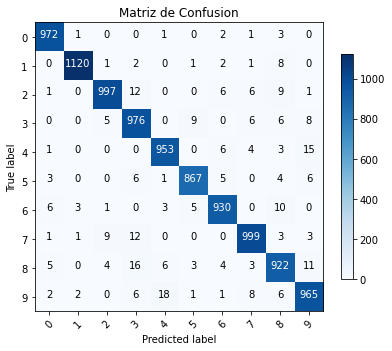

In [154]:
errores(MLP_1, test_X.reshape(10000, 784), output_test, test_y, train_X.reshape(60000, 784), output_train)

### Modelo MLP con funciones de activacion - Experimento 2 - Activacion tanh

In [155]:
MLP_2 = Sequential()

MLP_2.add(Dense(100, input_shape=(28*28,), activation='tanh'))
MLP_2.add(Dropout(0.2))
MLP_2.add(Dense(50, activation='tanh'))
MLP_2.add(Dropout(0.2))
MLP_2.add(Dense(25, activation='tanh'))
MLP_2.add(Dropout(0.2))

MLP_2.add(Dense(10, activation='softmax'))

# compilando modelo usando categorial crossentropy porque se hizo la transformacion a variables categoricas
MLP_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
monitor_val_acc_2 = EarlyStopping(
    monitor='val_accuracy',
    patience=5
)
modelCheckpoint_2 = ModelCheckpoint('MLP_tanh.hdf5', save_best_only=True)
model_2 = MLP_2.fit(
    train_X.reshape(60000, 784),
    output_train,
    epochs=50,
    validation_data=(
        test_X.reshape(10000, 784),
        output_test
    ),
    callbacks= [
        monitor_val_acc_2, modelCheckpoint_2
    ]
    
)

Epoch 1/50
1875/1875 [==============================] - 2s 835us/step - loss: 1.0125 - accuracy: 0.6611 - val_loss: 0.5405 - val_accuracy: 0.8348
Epoch 2/50
1875/1875 [==============================] - 1s 756us/step - loss: 0.7188 - accuracy: 0.7684 - val_loss: 0.4634 - val_accuracy: 0.8550
Epoch 3/50
1875/1875 [==============================] - 2s 808us/step - loss: 0.6145 - accuracy: 0.8053 - val_loss: 0.4002 - val_accuracy: 0.8772
Epoch 4/50
1875/1875 [==============================] - 1s 788us/step - loss: 0.5738 - accuracy: 0.8231 - val_loss: 0.3692 - val_accuracy: 0.8871
Epoch 5/50
1875/1875 [==============================] - 1s 771us/step - loss: 0.5582 - accuracy: 0.8259 - val_loss: 0.3541 - val_accuracy: 0.8935
Epoch 6/50
1875/1875 [==============================] - 1s 764us/step - loss: 0.5239 - accuracy: 0.8400 - val_loss: 0.3225 - val_accuracy: 0.9046
Epoch 7/50
1875/1875 [==============================] - 1s 730us/step - loss: 0.5002 - accuracy: 0.8478 - val_loss: 0.3247 -

Test loss 0.243987575173378
Test accuracy 0.9287999868392944
Test loss 0.07120001316070557


Test loss 0.23580574989318848
Test accuracy 0.931850016117096
Test loss 0.06814998388290405


Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.91      0.93      1032
           3       0.91      0.92      0.92      1010
           4       0.90      0.94      0.92       982
           5       0.93      0.89      0.91       892
           6       0.93      0.94      0.94       958
           7       0.94      0.94      0.94      1028
           8       0.89      0.89      0.89       974
           9       0.93      0.87      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



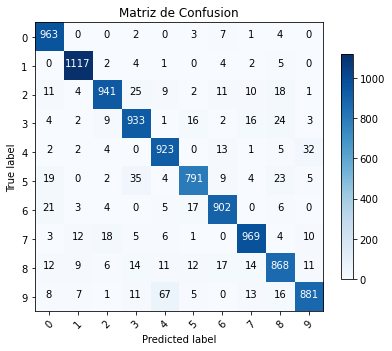

In [156]:
errores(MLP_2, test_X.reshape(10000, 784), output_test, test_y, train_X.reshape(60000, 784), output_train)

### Modelo MLP con funciones de activacion - Experimento 3 - Activacion Sigmoidal

In [157]:
MLP_3 = Sequential()

MLP_3.add(Dense(100, input_shape=(28*28,), activation='sigmoid'))
MLP_3.add(Dropout(0.2))
MLP_3.add(Dense(50, activation='sigmoid'))
MLP_3.add(Dropout(0.2))
MLP_3.add(Dense(25, activation='sigmoid'))
MLP_3.add(Dropout(0.2))

MLP_3.add(Dense(10, activation='softmax'))

# compilando modelo usando categorial crossentropy porque se hizo la transformacion a variables categoricas
MLP_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
monitor_val_acc_3 = EarlyStopping(
    monitor='val_accuracy',
    patience=5
)
modelCheckpoint_3 = ModelCheckpoint('MLP_sigmoid.hdf5', save_best_only=True)
model_3 = MLP_3.fit(
    train_X.reshape(60000, 784),
    output_train,
    epochs=50,
    validation_data=(
        test_X.reshape(10000, 784),
        output_test
    ),
    callbacks= [
        monitor_val_acc_3, modelCheckpoint_3
    ]
    
)

Epoch 1/50
1875/1875 [==============================] - 1s 764us/step - loss: 1.2065 - accuracy: 0.6090 - val_loss: 0.5811 - val_accuracy: 0.8469
Epoch 2/50
1875/1875 [==============================] - 1s 693us/step - loss: 0.6971 - accuracy: 0.7878 - val_loss: 0.4262 - val_accuracy: 0.8766
Epoch 3/50
1875/1875 [==============================] - 1s 733us/step - loss: 0.5965 - accuracy: 0.8212 - val_loss: 0.3780 - val_accuracy: 0.8915
Epoch 4/50
1875/1875 [==============================] - 1s 693us/step - loss: 0.5623 - accuracy: 0.8327 - val_loss: 0.3551 - val_accuracy: 0.8926
Epoch 5/50
1875/1875 [==============================] - 1s 716us/step - loss: 0.5238 - accuracy: 0.8468 - val_loss: 0.3301 - val_accuracy: 0.9034
Epoch 6/50
1875/1875 [==============================] - 1s 747us/step - loss: 0.4831 - accuracy: 0.8605 - val_loss: 0.3086 - val_accuracy: 0.9062
Epoch 7/50
1875/1875 [==============================] - 1s 699us/step - loss: 0.4635 - accuracy: 0.8658 - val_loss: 0.2891 -

Test loss 0.1996438205242157
Test accuracy 0.9416000247001648
Test loss 0.058399975299835205


Test loss 0.18374668061733246
Test accuracy 0.9434999823570251
Test loss 0.056500017642974854


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.98      0.98      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.94      0.91      0.92      1010
           4       0.95      0.95      0.95       982
           5       0.91      0.92      0.92       892
           6       0.95      0.96      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.94      0.91      0.93       974
           9       0.93      0.92      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



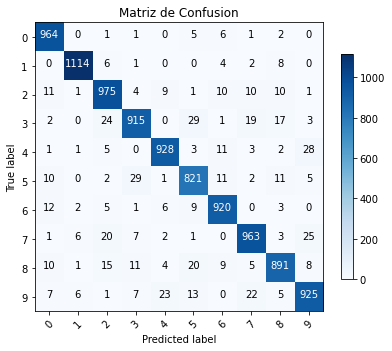

In [158]:
errores(MLP_3, test_X.reshape(10000, 784), output_test, test_y, train_X.reshape(60000, 784), output_train)

### Modelo MLP con funciones de activacion - Experimento 4 - Activacion Selu

In [159]:
MLP_4 = Sequential()

MLP_4.add(Dense(100, input_shape=(28*28,), activation='selu'))
MLP_4.add(Dropout(0.2))
MLP_4.add(Dense(50, activation='selu'))
MLP_4.add(Dropout(0.2))
MLP_4.add(Dense(25, activation='selu'))
MLP_4.add(Dropout(0.2))

MLP_4.add(Dense(10, activation='softmax'))

# compilando modelo usando categorial crossentropy porque se hizo la transformacion a variables categoricas
MLP_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
monitor_val_acc_4 = EarlyStopping(
    monitor='val_accuracy',
    patience=5
)
modelCheckpoint_4 = ModelCheckpoint('MLP_selu.hdf5', save_best_only=True)
model_4 = MLP_4.fit(
    train_X.reshape(60000, 784),
    output_train,
    epochs=50,
    validation_data=(
        test_X.reshape(10000, 784),
        output_test
    ),
    callbacks= [
        monitor_val_acc_4, modelCheckpoint_4
    ]
    
)

Epoch 1/50
1875/1875 [==============================] - 1s 788us/step - loss: 2.6721 - accuracy: 0.5643 - val_loss: 0.5391 - val_accuracy: 0.8660
Epoch 2/50
1875/1875 [==============================] - 1s 708us/step - loss: 0.7115 - accuracy: 0.8006 - val_loss: 0.3573 - val_accuracy: 0.9036
Epoch 3/50
1875/1875 [==============================] - 1s 722us/step - loss: 0.5425 - accuracy: 0.8483 - val_loss: 0.2828 - val_accuracy: 0.9254
Epoch 4/50
1875/1875 [==============================] - 1s 720us/step - loss: 0.4482 - accuracy: 0.8758 - val_loss: 0.2481 - val_accuracy: 0.9320
Epoch 5/50
1875/1875 [==============================] - 1s 711us/step - loss: 0.3980 - accuracy: 0.8913 - val_loss: 0.2342 - val_accuracy: 0.9386
Epoch 6/50
1875/1875 [==============================] - 1s 750us/step - loss: 0.3632 - accuracy: 0.9018 - val_loss: 0.2077 - val_accuracy: 0.9437
Epoch 7/50
1875/1875 [==============================] - 1s 719us/step - loss: 0.3437 - accuracy: 0.9066 - val_loss: 0.2154 -

Test loss 0.19131311774253845
Test accuracy 0.9584000110626221
Test loss 0.04159998893737793


Test loss 0.10053879022598267
Test accuracy 0.9716500043869019
Test loss 0.028349995613098145


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.97      0.98      1135
           2       0.96      0.97      0.96      1032
           3       0.95      0.94      0.95      1010
           4       0.97      0.96      0.96       982
           5       0.94      0.94      0.94       892
           6       0.96      0.96      0.96       958
           7       0.97      0.96      0.97      1028
           8       0.93      0.95      0.94       974
           9       0.96      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



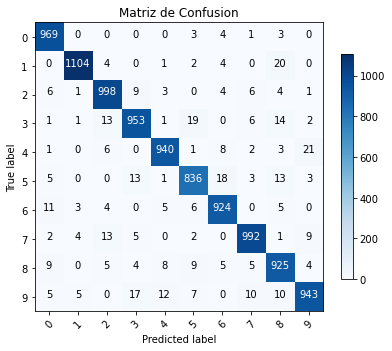

In [160]:
errores(MLP_4, test_X.reshape(10000, 784), output_test, test_y, train_X.reshape(60000, 784), output_train)

### Analisis

Text(0.5, 1.0, 'Comparacion Precicion Modelos')

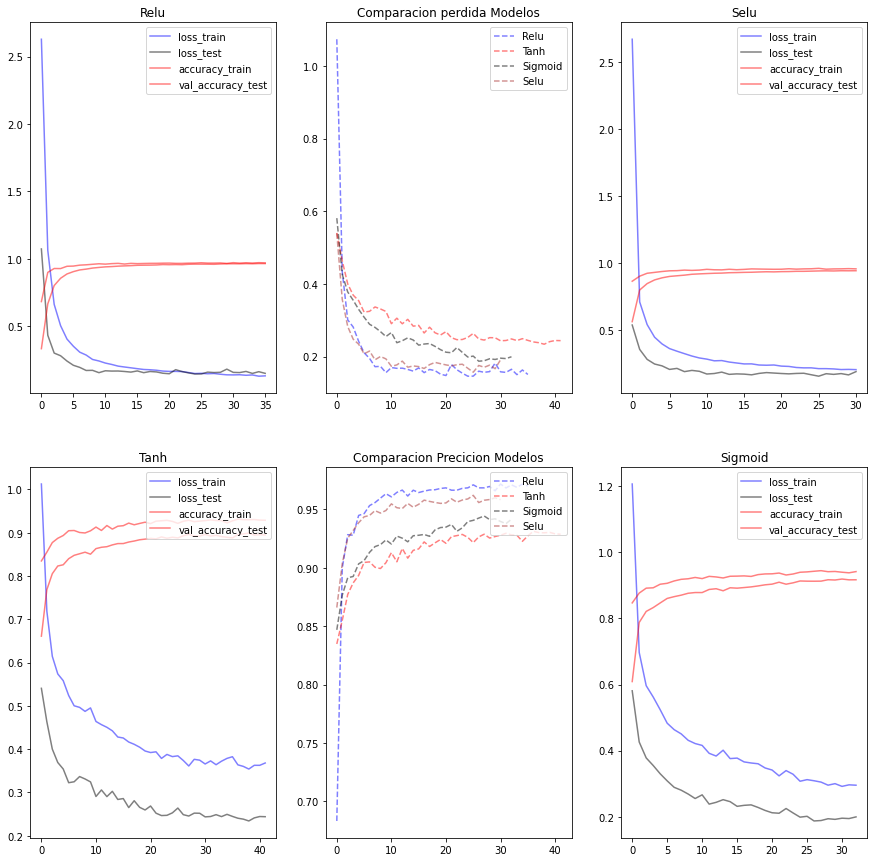

In [164]:
fig, ax = plt.subplots(2, 3, figsize = (15, 15))
### Relu
ax[0, 0].plot(model_1.history["loss"], color = 'blue', linestyle = '-', alpha = 0.5)
ax[0, 0].plot(model_1.history["val_loss"], color = 'black', linestyle = '-', alpha = 0.5)
ax[0, 0].plot(model_1.history["accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 0].plot(model_1.history["val_accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 0].legend(['loss_train', 'loss_test', 'accuracy_train', 'val_accuracy_test'], loc='upper right')
ax[0, 0].set_title('Relu')
### Tanh
ax[1, 0].plot(model_2.history["loss"], color = 'blue', linestyle = '-', alpha = 0.5)
ax[1, 0].plot(model_2.history["val_loss"], color = 'black', linestyle = '-', alpha = 0.5)
ax[1, 0].plot(model_2.history["accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[1, 0].plot(model_2.history["val_accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[1, 0].legend(['loss_train', 'loss_test', 'accuracy_train', 'val_accuracy_test'], loc='upper right')
ax[1, 0].set_title('Tanh')
### Sigmoid
ax[1, 2].plot(model_3.history["loss"], color = 'blue', linestyle = '-', alpha = 0.5)
ax[1, 2].plot(model_3.history["val_loss"], color = 'black', linestyle = '-', alpha = 0.5)
ax[1, 2].plot(model_3.history["accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[1, 2].plot(model_3.history["val_accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[1, 2].legend(['loss_train', 'loss_test', 'accuracy_train', 'val_accuracy_test'], loc='upper right')
ax[1, 2].set_title('Sigmoid')
### Selu
ax[0, 2].plot(model_4.history["loss"], color = 'blue', linestyle = '-', alpha = 0.5)
ax[0, 2].plot(model_4.history["val_loss"], color = 'black', linestyle = '-', alpha = 0.5)
ax[0, 2].plot(model_4.history["accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 2].plot(model_4.history["val_accuracy"], color = 'red', linestyle = '-', alpha = 0.5)
ax[0, 2].legend(['loss_train', 'loss_test', 'accuracy_train', 'val_accuracy_test'], loc='upper right')
ax[0, 2].set_title('Selu')
### Comparacion de modelos loss
ax[0,1].plot(model_1.history['val_loss'], color = 'blue', linestyle='--', alpha = 0.5)
ax[0,1].plot(model_2.history['val_loss'], color = 'red', linestyle='--', alpha = 0.5)
ax[0,1].plot(model_3.history['val_loss'], color = 'black', linestyle='--', alpha = 0.5)
ax[0,1].plot(model_4.history['val_loss'], color = 'brown', linestyle='--', alpha = 0.5)
ax[0,1].legend(['Relu', 'Tanh', 'Sigmoid', 'Selu'], loc='upper right')
ax[0,1].set_title('Comparacion perdida Modelos')
### Comparacion de modelos accuracy
ax[1,1].plot(model_1.history['val_accuracy'], color = 'blue', linestyle='--', alpha = 0.5)
ax[1,1].plot(model_2.history['val_accuracy'], color = 'red', linestyle='--', alpha = 0.5)
ax[1,1].plot(model_3.history['val_accuracy'], color = 'black', linestyle='--', alpha = 0.5)
ax[1,1].plot(model_4.history['val_accuracy'], color = 'brown', linestyle='--', alpha = 0.5)
ax[1,1].legend(['Relu', 'Tanh', 'Sigmoid', 'Selu'], loc='upper right')
ax[1,1].set_title('Comparacion Precicion Modelos')


### Conclusiones
Todas las MLP se comportaron de una buena forma pero las dos mejores fueron las que ocuparon la capa de activacion RELU y SELU